# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[784,20,10], grid=3, k=3, seed=42)

cpu
checkpoint directory created: ./model
saving model version 0.0


Create dataset

In [2]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Step 1: Define Transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the images to 1D
])

# Step 2: Load MNIST Dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Step 3: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 4: Verify the DataLoader
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")  # Should be [64, 1, 28, 28]
    print(f"Batch of labels shape: {labels.shape}")  # Should be [64]
    break

Batch of images shape: torch.Size([64, 784])
Batch of labels shape: torch.Size([64])


In [3]:
for images, labels in train_loader:
    images = images.view(images.size(0), -1)  # Flatten the images (28x28 -> 784)
    print(images.shape)  # Should be [batch_size, 784]
    break

torch.Size([64, 784])


In [4]:
train_loader

In [5]:
train_loader.dataset.data.shape, train_loader.dataset.targets.shape, test_loader.dataset.data.shape, test_loader.dataset.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [6]:
train_loader.dataset.data.shape, train_loader.dataset.targets.shape, test_loader.dataset.data[0], test_loader.dataset.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [7]:
# Flatten the MNIST images
flattened_data = train_loader.dataset.data.view(train_loader.dataset.data.size(0), -1).float()

In [8]:
# Normalize the flattened data
normalized_data = (flattened_data / 255.0)  # Normalize to [0, 1]

In [9]:
# Pass the normalized data to the model
output = model(normalized_data)

RuntimeError: [enforce fail at alloc_cpu.cpp:115] data. DefaultCPUAllocator: not enough memory: you tried to allocate 7526400000 bytes.

In [ ]:
# from kan.utils import create_dataset
# # create dataset f(x,y) = exp(sin(pi*x)+y^2)
# f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
# dataset = create_dataset(f, n_var=2, device=device)
# dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

In [ ]:
# # plot KAN at initialization
# model(dataset['train_input']);
# model.plot()

In [21]:
# plot KAN at initialization
model(train_loader.dataset.data);
model.plot()

IndexError: index 28 is out of bounds for dimension 0 with size 28

Train KAN with sparsity regularization

In [6]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 1.97e-02 | test_loss: 1.96e-02 | reg: 5.75e+00 | : 100%|█| 50/50 [00:24<00:00,  2.08it

saving model version 0.1


Plot trained KAN

In [20]:
# # plot KAN at initialization
# model(dataset['train_input']);
# model.plot()

In [22]:
model.plot()

Exception: model hasn't seen any data yet.

Prune KAN and replot

saving model version 0.2


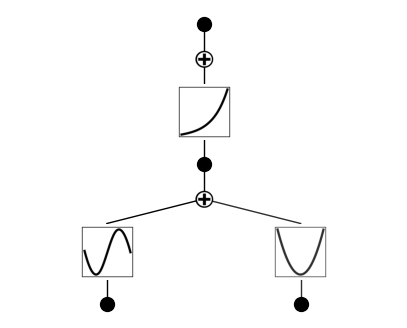

In [8]:
model = model.prune()
model.plot()

Continue training and replot

In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.77e-02 | test_loss: 1.70e-02 | reg: 8.37e+00 | : 100%|█| 50/50 [00:07<00:00,  7.09it


saving model version 0.3


In [10]:
model = model.refine(10)

saving model version 0.4


In [11]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.62e-04 | test_loss: 4.70e-04 | reg: 8.34e+00 | : 100%|█| 50/50 [00:08<00:00,  5.74it

saving model version 0.5


Automatically or manually set activation functions to be symbolic

In [12]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999999192750186, c=2
fixing (0,1,0) with x^2, r2=0.9999999835650273, c=2
fixing (1,0,0) with exp, r2=0.9999999909570408, c=2
saving model version 0.6


Continue training till machine precision

In [13]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.88e-13 | test_loss: 1.98e-13 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 18.10it

saving model version 0.7


Obtain the symbolic formula

In [14]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*sin(3.1416*x_1))

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load and preprocess MNIST
def get_mnist_loaders(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
    train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# Define a Spline Activation Function
class SplineActivation(nn.Module):
    def __init__(self, num_knots=10):
        super().__init__()
        self.knots = nn.Parameter(torch.linspace(-1, 1, num_knots))
        self.values = nn.Parameter(torch.randn(num_knots))
    
    def forward(self, x):
        return torch.interp(x, self.knots, self.values)

# Define the KAN Model
class KAN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.spline1 = SplineActivation()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.spline1(self.fc1(x))
        x = self.fc2(x)
        return x

# Training Function
def train_kan(model, train_loader, epochs=5, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluate the Model
def test_kan(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader, test_loader = get_mnist_loaders()
kan_model = KAN().to(device)
train_kan(kan_model, train_loader)
test_kan(kan_model, test_loader)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.32MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.60MB/s]


AttributeError: module 'torch' has no attribute 'interp'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load and preprocess MNIST
def get_mnist_loaders(batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
    train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    test_set = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# Define a Spline Activation Function
class SplineActivation(nn.Module):
    def __init__(self, num_knots=10):
        super().__init__()
        self.knots = nn.Parameter(torch.linspace(-1, 1, num_knots))  # Knot positions
        self.values = nn.Parameter(torch.randn(num_knots))  # Values at knots
    
    def forward(self, x):
        # Perform linear interpolation manually
        x_clamped = torch.clamp(x, min=self.knots[0].item(), max=self.knots[-1].item())
        indices = torch.searchsorted(self.knots, x_clamped) - 1
        indices = torch.clamp(indices, 0, len(self.knots) - 2)
        
        x0 = self.knots[indices]
        x1 = self.knots[indices + 1]
        y0 = self.values[indices]
        y1 = self.values[indices + 1]
        
        # Linear interpolation
        t = (x_clamped - x0) / (x1 - x0)
        return y0 + t * (y1 - y0)

# Define the KAN Model
class KAN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.spline1 = SplineActivation()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.spline1(self.fc1(x))
        x = self.fc2(x)
        return x

# Training Function
def train_kan(model, train_loader, epochs=5, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluate the Model
def test_kan(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Main Execution
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader, test_loader = get_mnist_loaders()
kan_model = KAN().to(device)
train_kan(kan_model, train_loader)
test_kan(kan_model, test_loader)

Epoch 1, Loss: 0.7853
Epoch 2, Loss: 0.6973
Epoch 3, Loss: 0.6967
Epoch 4, Loss: 0.7673
Epoch 5, Loss: 0.8591
Test Accuracy: 65.86%
